In [1]:
import numpy as np
import matplotlib.pyplot as plt
import moving_frame as mf

from geomstats.geometry.hypersphere import Hypersphere
from IPython.display import clear_output

N = 82
n = 2

B = mf.init_fourier_basis(n,N)

manifold = Hypersphere(dim=n*N)

frames=[]

for t in range(62): 
    clear_output(wait=True)
    print(t)
    #1) Load Data
    beta,idx,mode_idx = mf.load_KMKM_data(t)
    
    # clear_output(wait=True)
    # mf.plot_frame(beta,mode_idx,idx)
    # plt.show()

    #2) Align to get preshape representation
    aligned_frame = mf.align_by_cluster(beta, idx, N=N, parallel=True)
    clear_output(wait=True)
    
    #3) Project into Fourier basis to get finite dimensional representation          
    means = [mf.function_project(B,component.q_mean) for component in aligned_frame]
    data = [mf.function_project(B,component.qn) for component in aligned_frame]
        
    #4) Moving Frame
    wgmm  = mf.WrappedGaussianMixture(manifold=manifold)
    wgmm.fit_frame(means,data)
    frames.append(wgmm)
       
clear_output(wait=True)
np.save("gmm_list.npy",frames)

61
Computing Karcher Mean of 72 curves in SRVF space..
updating step: 1
updating step: 2
updating step: 3
updating step: 4
updating step: 5
updating step: 6
updating step: 7
updating step: 8
updating step: 9
updating step: 10
updating step: 11
updating step: 12
Computing Karcher Mean of 12 curves in SRVF space..
updating step: 1
updating step: 2
updating step: 3
updating step: 4
updating step: 5
updating step: 6
updating step: 7
updating step: 8
Computing Karcher Mean of 10 curves in SRVF space..
updating step: 1
updating step: 2
updating step: 3
updating step: 4
updating step: 5


In [2]:
W = np.zeros((62,62))

for i,frame0 in enumerate(frames[:-1]):
    print(i,end=' ')
    for j,frame1 in enumerate(frames[i+1:]):
        W[i,i+j+1] = mf.wasserstein_type_distance(frame0,frame1)        

W=W+W.T

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 

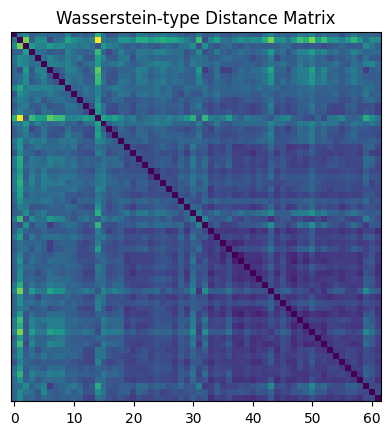

In [66]:
plt.imshow(W)
# plt.title("Wasserstein-type Distance Matrix")
plt.yticks([])

plt.gca().set_box_aspect(1)

plt.title("Wasserstein-type Distance Matrix")

# plt.legend(["Before Change Point", "After Change Point"])
# plt.show()
plt.savefig("data_files/images/nanoparticles_distances",dpi=250, bbox_inches='tight')


In [85]:
mf.e_divisive(W, sig_lvl = 0.0125, R = 499, min_size = 12, alpha = 1)

{'k_hat': 2,
 'order_found': [0, 62, 19],
 'estimates': [0, 19, 62],
 'considered_last': 37,
 'p_values': [0.002, 0.014],
 'permutations': [499, 499],
 'cluster': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])}

C:\Users\micha\Desktop\Research_test_3\virtual_environment_for_research\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


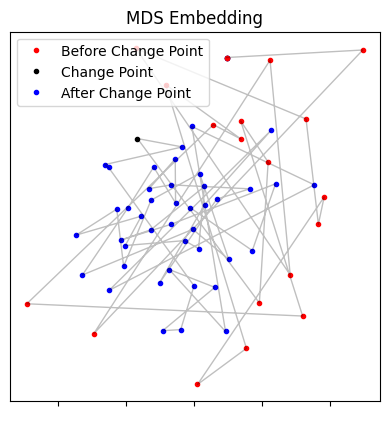

In [73]:
from sklearn.manifold import MDS

mds = MDS(dissimilarity='precomputed')

embedding = mds.fit(W).embedding_

plt.figure()
plt.plot(embedding[0,0],embedding[0,1],'.',c='red')
plt.plot(embedding[0,0],embedding[0,1],'.',c='black')
plt.plot(embedding[0,0],embedding[0,1],'.',c='blue')


for i,(x,y) in enumerate(embedding):
    if i<19:
        plt.plot(x,y,'.',c='red')
    elif i==19:
        plt.plot(x,y,'.',c='black')
    else:
        plt.plot(x,y,'.',c='blue')

plt.plot(embedding[:,0], embedding[:,1],c='black',alpha=.25,linewidth=1)
     
plt.gca().set_box_aspect(1)

# plt.xticks([])
plt.xticks(c='white')
plt.yticks([])

plt.legend(["Before Change Point","Change Point", "After Change Point"])
plt.title("MDS Embedding")
# plt.show()
plt.savefig("data_files/images/nanoparticles_mds_plot",dpi=250, bbox_inches='tight')

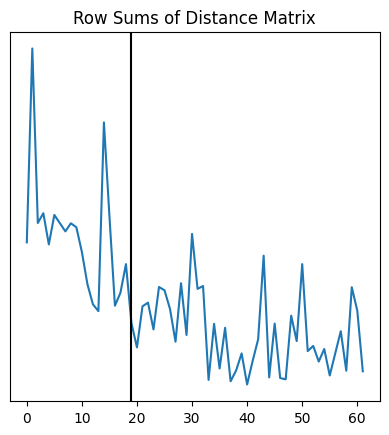

In [74]:
plt.plot(sum(W))
plt.axvline(19,c='black')
plt.gca().set_box_aspect(1)
plt.yticks([])
plt.title("Row Sums of Distance Matrix")

# plt.show()
plt.savefig("data_files/images/nanoparticles_row_sums_plot",dpi=250, bbox_inches='tight')

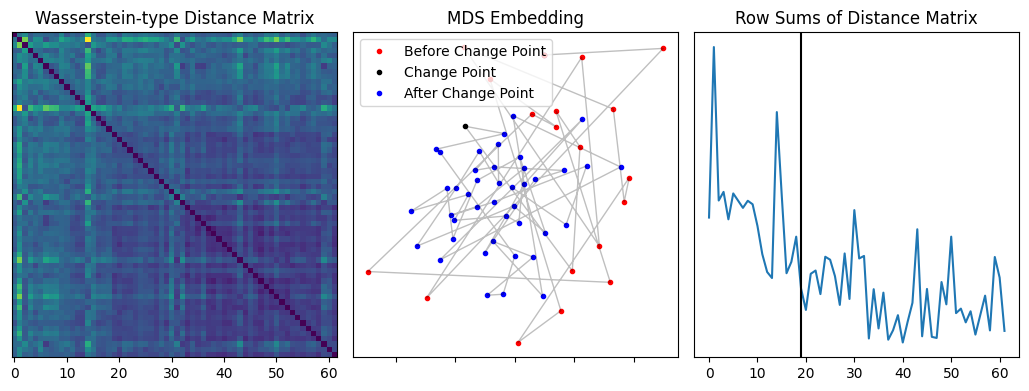

In [83]:
plt.figure(figsize=(2*6.5,2*3.25))

plt.subplot(1,3,1)
plt.imshow(W)
# plt.title("Wasserstein-type Distance Matrix")
plt.yticks([])
plt.gca().set_box_aspect(1)
plt.title("Wasserstein-type Distance Matrix")


plt.subplot(1,3,2)
plt.plot(embedding[0,0],embedding[0,1],'.',c='red')
plt.plot(embedding[0,0],embedding[0,1],'.',c='black')
plt.plot(embedding[0,0],embedding[0,1],'.',c='blue')

for i,(x,y) in enumerate(embedding):
    if i<19:
        plt.plot(x,y,'.',c='red')
    elif i==19:
        plt.plot(x,y,'.',c='black')
    else:
        plt.plot(x,y,'.',c='blue')

plt.plot(embedding[:,0], embedding[:,1],c='black',alpha=.25,linewidth=1)

plt.gca().set_box_aspect(1)
plt.xticks(c='white')
plt.yticks([])
plt.legend(["Before Change Point","Change Point", "After Change Point"])
plt.title("MDS Embedding")



plt.subplot(1,3,3)
plt.plot(sum(W))
plt.axvline(19,c='black')
plt.gca().set_box_aspect(1)
plt.yticks([])
plt.title("Row Sums of Distance Matrix")

plt.subplots_adjust(wspace=.05, hspace=0)

# plt.show()
plt.savefig("data_files/images/nanoparticles_full",dpi=250, bbox_inches='tight')

In [7]:
import ot

#Wasserstein-type distance
def wasserstein_type_distance_covariance(mu0,mu1):
    d_M=np.zeros((mu0.n_components,mu1.n_components))
    d_B=np.zeros((mu0.n_components,mu1.n_components))

    for i in range(mu0.n_components):
        (m0,sigma0)= (mu0.means[i],mu0.covariances[i])
        for j in range(mu1.n_components):
            (m1,sigma1)= (mu1.means[j],mu1.covariances[j])

            # #normalize just to make sure - generally ~0.99999
            # print(np.linalg.norm(m0))
            # print(np.linalg.norm(m1))
#             m0=m0/np.linalg.norm(m0)
#             m1=m1/np.linalg.norm(m1)

#             d_M[i,j] = np.arccos(m0@m1)

            # #use svd to calculate square roots - no issues with complex values
            u0,s0,v0 = np.linalg.svd(sigma0)
            sqrt_sigma0 = u0@np.diag(np.sqrt(s0))@u0.T
            cross_term = sqrt_sigma0 @ sigma1 @ sqrt_sigma0
            u2,s2,v2 = np.linalg.svd(cross_term)
            sqrt_cross_term = u2@np.diag(np.sqrt(s2))@v2

            d_B[i,j] = np.trace(sigma0 + sigma1 -2*sqrt_cross_term)
            # d_B[i,j] = np.real(np.trace(sigma0 + sigma1 -2*scipy.linalg.sqrtm(scipy.linalg.sqrtm(sigma0) + sigma1 + scipy.linalg.sqrtm(sigma0))))
      
    M = d_B 
    
    return ot.emd2(mu0.weights,mu1.weights,d_B)

In [8]:
MW_s = np.zeros((62,62))

for i,frame0 in enumerate(frames[:-1]):
    print(i,end=' ')
    for j,frame1 in enumerate(frames[i+1:]):
        MW_s[i,i+j+1] = wasserstein_type_distance_covariance(frame0,frame1)        

MW_s=MW_s+MW_s.T

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 

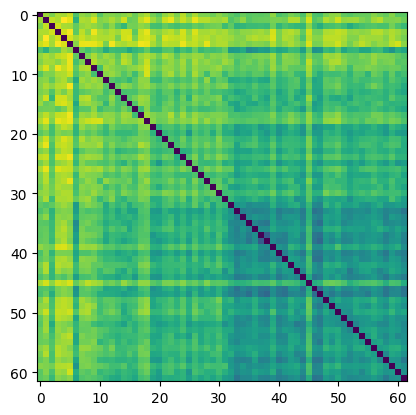

In [86]:
plt.imshow(MW_s)
plt.show()

In [88]:
mf.e_divisive(MW_s, sig_lvl = 0.0125, R = 499, min_size = 12, alpha = 1)

{'k_hat': 3,
 'order_found': [0, 62, 31, 18],
 'estimates': [0, 18, 31, 62],
 'considered_last': 43,
 'p_values': [0.002, 0.002, 0.892],
 'permutations': [499, 499, 499],
 'cluster': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])}

C:\Users\micha\Desktop\Research_test_3\virtual_environment_for_research\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


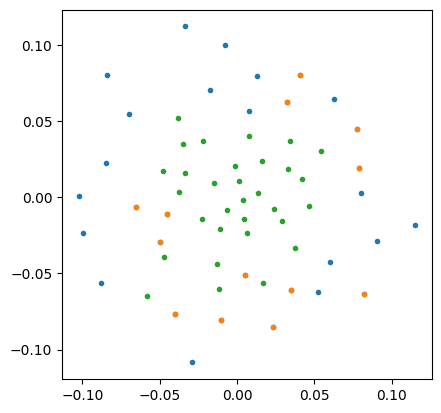

In [11]:
from sklearn.manifold import MDS

mds = MDS(dissimilarity='precomputed')

embedding = mds.fit(MW_s).embedding_

plt.plot(embedding[:31,0],embedding[:31,1],'.')
plt.plot(embedding[18:31,0],embedding[18:31,1],'.')
plt.plot(embedding[31:,0],embedding[31:,1],'.')


plt.gca().set_box_aspect(1)
plt.show()

In [14]:
# MW=np.loadtxt('MW.csv',delimiter=',')
# plt.hist((MW/W).flatten())